## Example2_sse_HR_dtout
HR  Generating plots

In [1]:
import pySEVN as SV

In [2]:
SEVN= "/home/jake/SEVN/sevndevel"
SV.set_path(SEVN)
SV.check_compile()

SEVN already compiled


In [3]:
### HR example
times=(0,1,10,100,1000)
sse_HR = SV.sse()
sse_HR.tables.LISTBIN = '/home/jake/SEVN/sevndevel/resources/tutorial_MIAPbP/Example2_sse_HR_dtout/listSin.txt'
sse_HR.run(NTHREADS=4, DTOUT=0.1, PRINTFILE= True)

RUN output saved to/home/jake/SEVN/sevndevel/sevn_output_py/run_output.txt
Directory '/home/jake/SEVN/sevndevel/sevn_output_py' created


## Output

In [4]:
sse_HR.output.print_all()
df=sse_HR.output_df()
df

{'BCOL': 'Semimajor:Eccentricity:BEvent',
 'LITPHASES': 'false',
 'LOGFILE': 'true',
 'LOGLEVEL': 'critical',
 'NAMEPREX': '',
 'OMODE': 'csv',
 'OUTPATH': '/home/jake/SEVN/sevndevel/sevn_output_py',
 'RUNCMD': '/home/jake/SEVN/sevndevel/build/exe/sevn.x -nthreads 4 -ev_Nchunk '
           '1000 -dtout 0.1 -list '
           '/home/jake/SEVN/sevndevel/resources/tutorial_MIAPbP/Example2_sse_HR_dtout/listSin.txt '
           '-ibmode new -tables '
           '/home/jake/SEVN/sevndevel/tables/SEVNtracks_parsec_ov05_AGB '
           '-tables_HE '
           '/home/jake/SEVN/sevndevel/tables/SEVNtracks_parsec_pureHe36 -tf '
           'list -tini list -rseed false -o '
           '/home/jake/SEVN/sevndevel/sevn_output_py -omode csv -log_level '
           'critical -io_literal_phases false -io_logfile true -scol '
           'Worldtime:Mass:MHE:MCO:Radius:Luminosity:Temperature:Phase:RemnantType '
           '-bcol Semimajor:Eccentricity:BEvent -sn_kicks unified '
           '-sn_pairinstab

,ID,name,Worldtime,Mass,MHE,MCO,Radius,Luminosity,Temperature,Phase,RemnantType
0,0,351367766348858,0.000000,2.999967,0.00000,0.0,1.442429,1.181742e+02,15845.650,1,0
1,0,351367766348858,0.100000,2.999967,0.00000,0.0,1.442756,1.181978e+02,15844.640,1,0
2,0,351367766348858,0.200000,2.999966,0.00000,0.0,1.443082,1.182213e+02,15843.640,1,0
3,0,351367766348858,0.300000,2.999966,0.00000,0.0,1.443409,1.182448e+02,15842.630,1,0
4,0,351367766348858,0.400000,2.999965,0.00000,0.0,1.443736,1.182683e+02,15841.630,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12604,49,778661197056302,4.700000,38.237420,16.75612,0.0,121.986800,6.003046e+05,14546.650,4,0
12605,49,778661197056302,4.800000,37.537780,17.41471,0.0,177.251200,6.021649e+05,12077.050,4,0
12606,49,778661197056302,4.900000,36.256920,17.54603,0.0,465.833800,6.018905e+05,7448.871,4,0
12607,49,778661197056302,5.000000,35.266850,17.65041,0.0,795.852700,6.009111e+05,5696.562,4,0


<IPython.core.display.Javascript object>


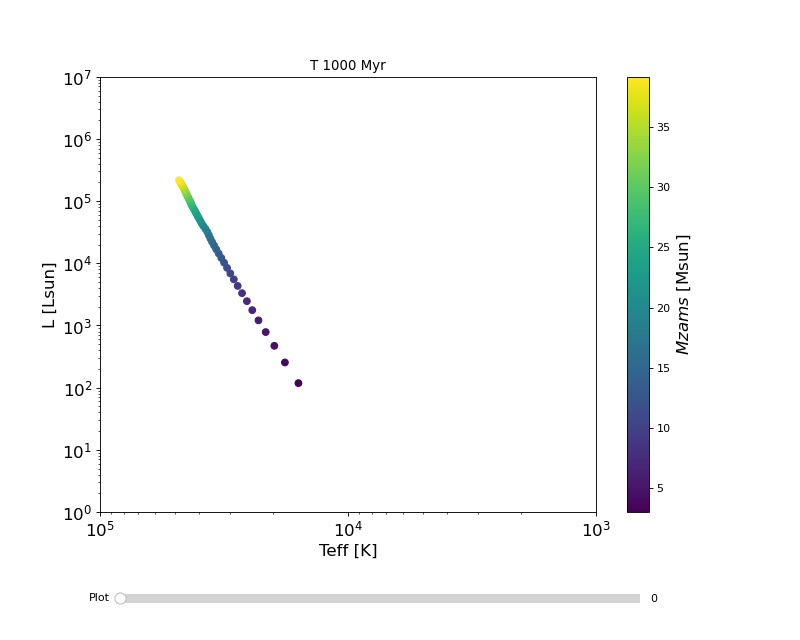

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

x, y, c = [], [], []
interactive = True
def setup_HR_plot(interactive = False):
    if interactive:
        plt.ion()
        ax.set_xlim([1e5,1e3])
        ax.set_ylim([1e0,1e7])
        ax.set_xscale("log")
        ax.set_yscale("log")
    else:
        
        plt.xscale("log")
        plt.yscale("log")
        plt.xlim(1e5,1e3)
        plt.ylim(1e0,1e7)
        
    plt.subplots_adjust(bottom=0.20)
    plt.xlabel("Teff [K]",fontsize=15)
    plt.ylabel("L [Lsun]",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"T {time} Myr")

for time in times:
    dft=df[df.Worldtime==time]
    if not interactive:
        fig, ax = plt.subplots(figsize=(10,8))
        setup_HR_plot(interactive)
        scat = plt.scatter(dft.Temperature,dft.Luminosity,c=dft.Mass)
        cb=fig.colorbar(scat)
        cb.set_label('$Mzams$ [Msun]',fontsize=15)
        plt.show()
    else:
        x.append(dft.Temperature.to_numpy())
        y.append(dft.Luminosity.to_numpy())
        c.append(dft.Mass.to_numpy())

if interactive: 
    init = 0
    fig, ax = plt.subplots(figsize=(10,8))
    setup_HR_plot(interactive)
    scat = ax.scatter(x[init], y[init], c=c[0])
    cb=fig.colorbar(scat)
    cb.set_label('$Mzams$ [Msun]',fontsize=15)

    ax_slider = plt.axes([0.15, 0.05, 0.65, 0.03])
    slider = Slider(ax_slider, 'Plot', 0, 4, valinit=init, valstep=1.0)

    #  Update function, called upon slider movement
    def update(val):
        val = int(val)
        ax.set_title(f"T {times[val]} Myr")
        scat.set_array(c[val])
        xx = np.vstack((x[val], y[val]))
        scat.set_offsets(xx.T)

    slider.on_changed(update)
    plt.show()